# 2603655_DataAcquisition

## Week10 20241015

---
* Author:  [Yuttapong Mahasittiwat](mailto:khala1391@gmail.com)
* Technologist | Data Modeler | Data Analyst
* [YouTube](https://www.youtube.com/khala1391)
* [LinkedIn](https://www.linkedin.com/in/yuttapong-m/)
* [Tableau](https://public.tableau.com/app/profile/yuttapong.m/vizzes)
---

ref: [perplexity](https://www.perplexity.ai/page/data-serialization-in-python-zZWLiYc1SV2mG2ks33iWmg)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        2 non-null      object
 1   birth_date  2 non-null      object
 2   picture     2 non-null      object
dtypes: object(3)
memory usage: 180.0+ bytes

    name  birth_date                                            picture
0  buraj  2022-10-10  /9j/4AAQSkZJRgABAQAAAQABAAD/4QB+RXhpZgAASUkqAA...
1  hello  2022-10-11  /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgMCAgMDAw...
Name: buraj
Birth date: 2022-10-10


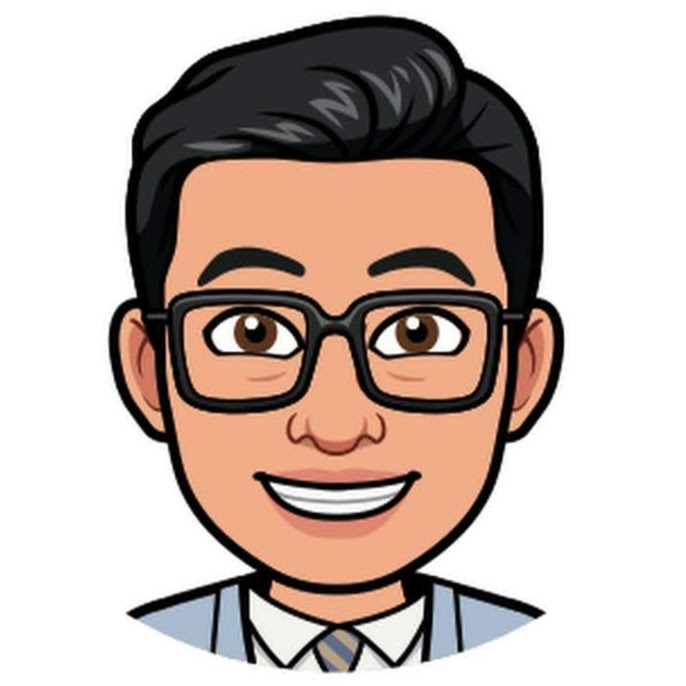

Name: hello
Birth date: 2022-10-11


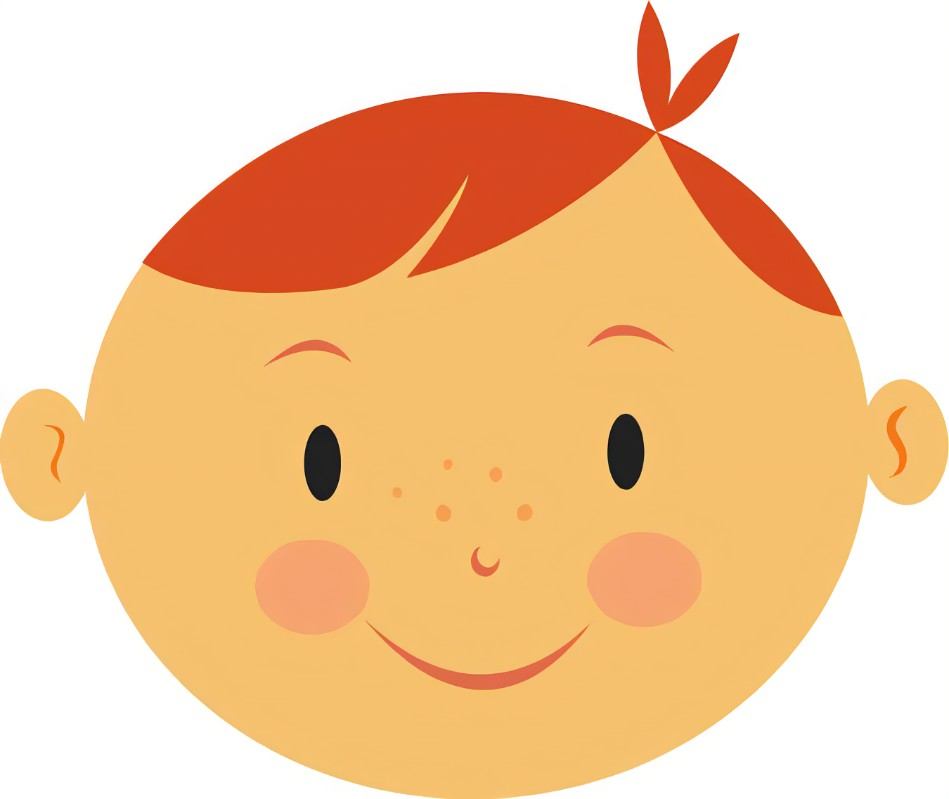

In [15]:
import pandas as pd
import base64
from IPython.display import Image

persons = pd.read_xml('data/persons.xml')

# dtype as object
persons.info()

print()
print(persons)

for i in persons.index:
  print(f'Name: {persons.iloc[i]["name"]}')
  print(f'Birth date: {persons.iloc[i]["birth_date"]}')
  pic = base64.b64decode(persons.iloc[i]["picture"])  # decode
  display(Image(pic,width=100))


### Key method in ElementTree.Parse

In [14]:
import xml.etree.ElementTree as ET   # parsing XML data

tree = ET.parse('data/persons.xml')
root = tree.getroot()


# operation for each method
# for element in root.iter():   # Element object
#   print(element.tag)          # string identify what kind of data
#   print(element.attrib)       # dictionary containing  element's
#   print(element.text)
#   print('------')

for record in root:
  for person in record:
    print(person.tag)
    print(f'  {person.text}')
    print('----')

#recursive data structure

name
  buraj
----
birth_date
  2022-10-10
----
picture
  /9j/4AAQSkZJRgABAQAAAQABAAD/4QB+RXhpZgAASUkqAAgAAAACADEBAgAHAAAAJgAAAGmHBAABAAAALgAAAAAAAABHb29nbGUAAAMAAJAHAAQAAAAwMjIwAaADAAEAAAABAAAABaAEAAEAAABYAAAAAAAAAAIAAQACAAQAAABSOTgAAgAHAAQAAAAwMTAwAAAAAP/bAIQAAwICCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICggIBwgJCQkIBwsNCggNBwgJCAEDBAQGBQYKBgYKDQ0KDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NCA0IDQ0IDQgIDQ0ICA0ICAgICAgICAgICAgICAgICAgI/8AAEQgCrgKuAwEiAAIRAQMRAf/EAB4AAQAABgMBAAAAAAAAAAAAAAABAgYHCAkDBAUK/8QAUxAAAQMCAgcEBgYGBgcIAgMBAQACAwQRBSEGBwgSMUFRCRNhcRQiMoGRoSNCUrHB0RUzYnKS8CRDU4Lh8SVEY3N0k6IWFzVUZIOysxg0NkVVJv/EABsBAQABBQEAAAAAAAAAAAAAAAACAQMEBQYH/8QANhEAAgIBBAEDAgQFAwQDAQAAAAECAxEEBSExEhNBUSJhFDJCcQYjUoGRFTOxYqHB8BZD0ST/2gAMAwEAAhEDEQA/ANqaIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIigXICKKUOUHygICdFwipF7I+Q8gPfkgOZFwd67p810sR0ihizlljj/AHnAID07qBcqRl1p4aONbTjzkaur/wB8WFf+fp/+a1AVyHKKpnDtYdDJ+rq4H35CRq9xtZcXbZw6gghAdpFwCV3QKb0gcDxQHKil3lEOQEUREAREQBERAEREAREQBER

### Create XML from scratch

In [17]:
import xml.etree.ElementTree as ET


# testing create XML
# class xml.etree.ElementTree.Element(tag, attrib={})
root = ET.Element('data')

# xml.etree.ElementTree.SubElement(parent, tag, attrib={})
item1 = ET.SubElement(root,'item')
item1.set('name','item 1')          # method of Element => set(key, value)  
item1.text = 'this is item 1'       # method of Element  

item11 = ET.SubElement(item1,'sub_item')
item11.text = 'sub item 1.1'

item2 = ET.SubElement(root,'item')
item2.set('name','item 2')
item2.text = 'this is item 2'

tree = ET.ElementTree(root)


# xml.etree.ElementTree.ElementTree.write(file, encoding='us-ascii', xml_declaration=None, default_namespace=None, method='xml')
tree.write('data/data.xml')     # method of ElementTree
print('done')


done


### Create XML from URL

In [1]:
import pytz                         # timezone calculation
from datetime import datetime
import pandas as pd
import xml.etree.ElementTree as ET
import requests
import re

cities = ['Bangkok','Chiang Mai','Phuket','Pattaya']
weather = list()

for i, city in enumerate(cities):
  url = f'https://wttr.in/{city}?format=%t&m'
  response = requests.get(url)
  temperature = response.text.strip()
  temperature = re.findall(f'\d+',temperature)  #re.findall(pattern, string)

  url = f'https://wttr.in/{city}?format=%h'
  response = requests.get(url)
  humidity = response.text.strip()          # select text and strip 
  humidity = re.findall(f'\d+',humidity)

  # print('-----')
  # print(temperature)
  # print(humidity)
  # print('-----')

  bangkok_tz = pytz.timezone('Asia/Bangkok')      # get time in specified timezone
  weather.append({'city':city,
                  'datetime':datetime.now(bangkok_tz).strftime('%Y-%m-%d %H:%M:%S'),
                  'temperature':temperature[0],
                  'humidity':humidity[0]
                })
df_weather = pd.DataFrame(weather)          # list of dictionary
df_weather.info()
df_weather


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         4 non-null      object
 1   datetime     4 non-null      object
 2   temperature  4 non-null      object
 3   humidity     4 non-null      object
dtypes: object(4)
memory usage: 260.0+ bytes


,city,datetime,temperature,humidity
0,Bangkok,2024-10-16 00:51:01,30,75
1,Chiang Mai,2024-10-16 00:51:03,22,97
2,Phuket,2024-10-16 00:51:05,28,84
3,Pattaya,2024-10-16 00:51:07,27,84


In [2]:
df_weather['datetime'] = df_weather['datetime'].astype('datetime64[ns]')
df_weather['temperature'] = df_weather['temperature'].astype('int64')
df_weather['humidity'] = df_weather['humidity'].astype('int64')
df_weather.info()
df_weather

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   city         4 non-null      object        
 1   datetime     4 non-null      datetime64[ns]
 2   temperature  4 non-null      int64         
 3   humidity     4 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 260.0+ bytes


,city,datetime,temperature,humidity
0,Bangkok,2024-10-16 00:51:01,30,75
1,Chiang Mai,2024-10-16 00:51:03,22,97
2,Phuket,2024-10-16 00:51:05,28,84
3,Pattaya,2024-10-16 00:51:07,27,84


### Create XML from DataFrame

In [4]:
root = ET.Element('weather')                  # class xml.etree.ElementTree.Element(tag, attrib={})
for _,row in df_weather.iterrows():           # Iterate over DataFrame rows as (index, Series) pairs.
  record = ET.SubElement(root,'record')       # xml.etree.ElementTree.SubElement(parent, tag, attrib={})

  for col,value in row.items():
    element = ET.SubElement(record,col)
    element.text = str(value)                 # method of Element

    dtype = str(df_weather[col].dtype)        # series.dtype
    element.set('dtype',dtype)                # method of Element => set(key, value)

tree = ET.ElementTree(root)
tree.write('data/weather655.xml',encoding='utf-8',xml_declaration=True)
print('done')

done


### XML to DataFrame

In [6]:
import pandas as pd
import xml.etree.ElementTree as ET

tree = ET.parse('data/weather655.xml')
root = tree.getroot()

data = list()
columns = list()

i = 0
for record in root.findall('record'):
  row_data = dict()
  for element in record:
    column = element.tag
    value = element.text
    dtype = element.get('dtype')

    if dtype == 'int64':
      value = int(value)
    elif dtype == 'float64':
      value = float(value)
    elif dtype == 'datetime64[ns]':
      value = pd.to_datetime(value)

    row_data[column] = value
    if column not in columns:
      columns.append(column)
  data.append(row_data)
df_weather = pd.DataFrame(data,columns=columns)
df_weather.info()
df_weather

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   city         4 non-null      object        
 1   datetime     4 non-null      datetime64[ns]
 2   temperature  4 non-null      int64         
 3   humidity     4 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 260.0+ bytes


,city,datetime,temperature,humidity
0,Bangkok,2024-10-16 00:51:01,30,75
1,Chiang Mai,2024-10-16 00:51:03,22,97
2,Phuket,2024-10-16 00:51:05,28,84
3,Pattaya,2024-10-16 00:51:07,27,84


### Parse XML from URL (cleaning on complex tag)

In [8]:
import requests
import xml.etree.ElementTree as ET
import re

url = 'https://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml'
response = requests.get(url)

if response.status_code == 200:
  xml_string = response.content.decode('utf-8')           # r.content for HTML,XML
  xml_string = xml_string.replace('gesmes:','')
  xml_string = re.sub(r'<Envelope[^>]+>','<Envelope>',xml_string)  # re.sub(pattern, repl, string)
  # print(xml_string)

# xml.etree.ElementTree.fromstring(text, parser=None)
  root = ET.fromstring(xml_string)                                 # parses XML from a string directly into an Element
  currency_elements = root.findall('.//Cube[@currency][@rate]')    # @ ==> internal variable 
  currency_rates = dict()

# .// means it will search for elements at any depth from the current root element.
# Cube refers to XML elements with the tag name "Cube".
# [@currency] filters those Cube elements that have an attribute named currency.
# [@rate] further filters the results to only those Cube elements that also have an attribute named rate

  for element in currency_elements:
    currency = element.get('currency')
    rate = element.get('rate')
    currency_rates[currency] = float(rate)

  for currency,rate in currency_rates.items():
    print(f'{currency}: {rate:0.3f}')

else:
  print('cannot read XML data')

USD: 1.090
JPY: 162.850
BGN: 1.956
CZK: 25.242
DKK: 7.461
GBP: 0.834
HUF: 400.480
PLN: 4.294
RON: 4.976
SEK: 11.301
CHF: 0.940
ISK: 149.300
NOK: 11.766
TRY: 37.352
AUD: 1.624
BRL: 6.095
CAD: 1.506
CNY: 7.757
HKD: 8.469
IDR: 16927.020
ILS: 4.090
INR: 91.622
KRW: 1482.730
MXN: 21.210
MYR: 4.699
NZD: 1.790
PHP: 63.068
SGD: 1.427
THB: 36.345
ZAR: 19.165


### Create XML from URL and archiving

- XML is primarily used as a data format
    -  static and stored in files, databases, or exchanged over the network between systems

- DOM is used for manipulating an XML or HTML document
    -  the DOM gives you the ability to traverse, modify, and query the document's structure and content

- **Aspect**:	lxml.etree	
- **Performance**:	Faster, C-based, handles large XML	
- **XPath Support**:	Full XPath 1.0 support	
- **XSLT Support**:	Yes
- **Error Handling**:	Detailed, robust	
- **HTML Parsing**:	Supports HTML, even broken HTML	
- **Schema Validation**:	Supports DTD, XML Schema, Relax NG	
- **Installation**:	External library (pip install lxml)	
- **Use Cases**:	Advanced XML/HTML processing, big data

In [9]:
import requests
from lxml import etree
import xml.dom.minidom
import zipfile
import io

currency_xml = dict()

# for currency in list(currency_rates.keys())[:1]:
for currency in list(currency_rates.keys()):
  url = 'https://www.ecb.europa.eu/rss/fxref-{0}.html'.format(currency.lower())
  response = requests.get(url)
  xml_string = response.content.decode('utf-8')

  root = etree.fromstring(response.content)
  etree.cleanup_namespaces(root)
  for element in root.getiterator():
    element.tag = etree.QName(element).localname

  xml_string = etree.tostring(root)
  # print(xml_string)

  parsed = xml.dom.minidom.parseString(xml_string)
  cleaned_xml = parsed.toprettyxml(indent=' ')
  cleaned_xml = cleaned_xml.replace('\n\n','')
  # print(cleaned_xml)

  currency_xml[currency] = cleaned_xml

# I/O: text I/O, binary I/O and raw I/O
# StringIO (string)  ==> tempo record on RAM ==> faster


# class zipfile.ZipFile(file, mode='r' or 'w')
zipf = zipfile.ZipFile('data/historyExchange5Days.zip','w')
for currency,str_ in currency_xml.items():
  file_content = io.StringIO(str_)
  
  # ZipFile.writestr(zinfo_or_arcname, data)
  zipf.writestr(f'file_{currency}.xml',file_content.getvalue()) 
zipf.close()
print('done')

done


## Week11 20241022

In [1]:
import zipfile
import io
import xml.etree.ElementTree as ET
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

,base_currency,target_currency,datetime,value
0,EUR,USD,2024-10-14 20:15:00,1.0915
1,EUR,USD,2024-10-11 20:15:00,1.0938
2,EUR,USD,2024-10-10 20:15:00,1.0932
3,EUR,USD,2024-10-09 20:15:00,1.0957
4,EUR,USD,2024-10-08 20:15:00,1.0982
5,EUR,JPY,2024-10-14 20:15:00,163.3900
6,EUR,JPY,2024-10-11 20:15:00,162.9400
7,EUR,JPY,2024-10-10 20:15:00,162.8500
8,EUR,JPY,2024-10-09 20:15:00,162.9700
9,EUR,JPY,2024-10-08 20:15:00,162.4900


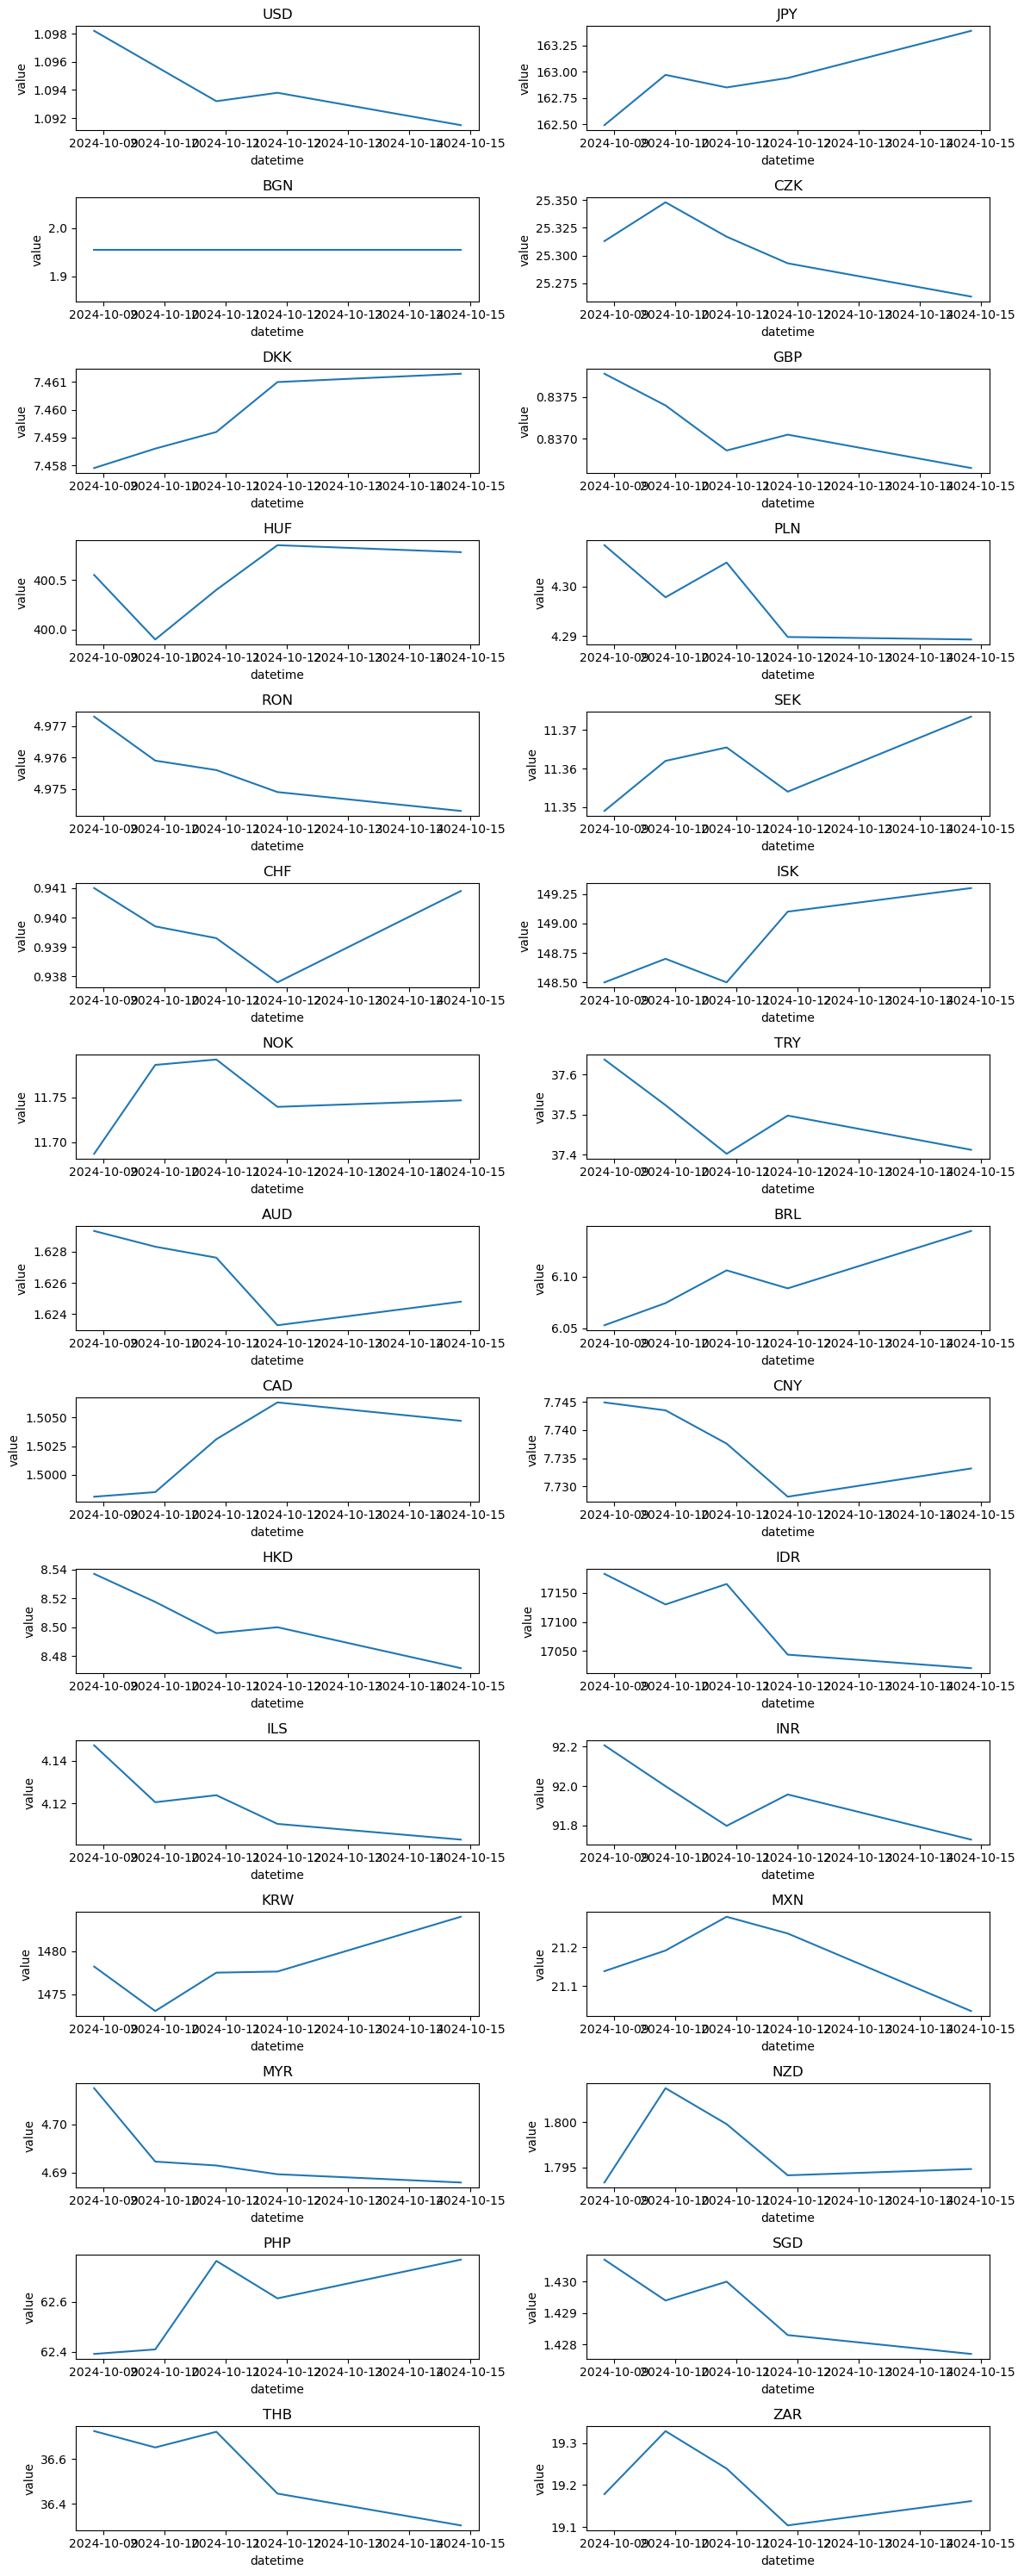

In [4]:
zipf = zipfile.ZipFile('data/historyExchange5Days.zip')

history_rate = list()

# zipf.namelist()
for filename in zipf.namelist():
# for filename in zipf.namelist()[:1]:
    with zipf.open(filename) as f:
        # print(filename)
        xml_string = f.read().decode('utf-8')
        
        # print(xml_string)
        root = ET.fromstring(xml_string)
        # print(ET.tostring(root, encoding ='unicode',  method ='xml'))
        
        items = root.findall('.//item')
        for item in items:
            history_rate.append({'base_currency': item.find('statistics/exchangeRate/baseCurrency').text,
                                 'target_currency': item.find('statistics/exchangeRate/targetCurrency').text,
                                 'datetime': item.find('date').text,
                                 'value':item.find('statistics/exchangeRate/value').text})
        
        
zipf.close()

df_history = pd.DataFrame(history_rate)
# df_history
# df_history.info()
df_history['datetime'] = pd.to_datetime(df_history['datetime'], utc=True)
df_history['datetime'] = df_history['datetime'].dt.tz_convert('Asia/Bangkok').dt.tz_localize(None)
df_history['value']= df_history['value'].astype('float64')
# df_history.info()
display(df_history.head(10))

plt_row =int(len(df_history['target_currency'].unique())/2)
plt_column = 4

fig, axes = plt.subplots(plt_row, plt_column, figsize =(12,2*plt_row))
axes = axes.flatten()

for  i, currency in enumerate(df_history['target_currency'].unique()):
    sns.lineplot(data = df_history[df_history['target_currency']==currency],
                 x= 'datetime',
                 y = 'value',
                 ax = axes[i])
    axes[i].set_title(currency)
plt.tight_layout()
plt.show()